In [52]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.special import expit  # sigmoid
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df =pd.read_excel("D:\\Réseaux de neurones\\PrédictionEfficacitéÉnergétiqueBâtiments\\energy+efficiency\\ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [54]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8:10]


Y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [55]:
def activation(x, func='sigmoid'):
    if func == 'sigmoid':
        return 1 / (1 + np.exp(-x))
    elif func == 'tanh':
        return np.tanh(x)
    elif func == 'relu':
        return np.maximum(0, x)
    else:
        raise ValueError("Fonction d'activation non reconnue")

In [68]:
# Classe ELM
class ELM:
    def __init__(self, n_hidden, activation_function='sigmoid'):
        self.n_hidden = n_hidden
        self.activation_function = activation_function

    def fit(self, X, T):
        N, n = X.shape
        L = self.n_hidden
        m = T.shape[1] if T.ndim > 1 else 1
        T=T.values
        T = T.reshape(N, m)

        # Initialisation aléatoire des poids W (L, n) et biais B (L, 1)
        self.W = np.random.randn(L, n)
        self.B = np.random.randn(L, 1)

        # Calcul de la matrice cachée H (N, L)
        H = activation(np.dot(X, self.W.T) + self.B.T, self.activation_function)

        # Calcul de β = H⁺T (pseudo-inverse de H)
        H_pinv = np.linalg.pinv(H)
        self.Beta = np.dot(H_pinv, T)

    def predict(self, X):
        H = activation(np.dot(X, self.W.T) + self.B.T, self.activation_function)
        return np.dot(H, self.Beta)


In [70]:

# Division train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)




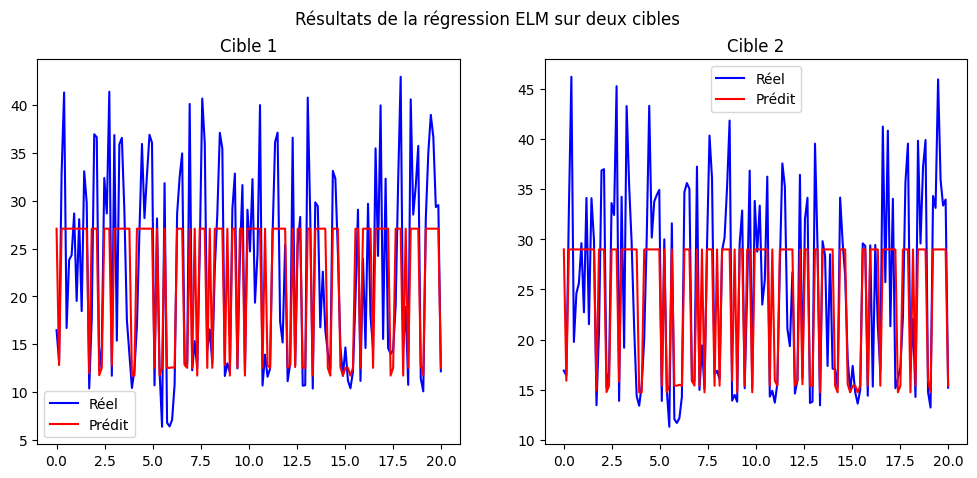

In [72]:
# Entraînement du modèle ELM
elm = ELM(n_hidden=30, activation_function='tanh')
elm.fit(X_train, Y_train)


Y_pred = elm.predict(X_test)
valeurs = np.linspace(0, 20, 154)
plt.figure(figsize=(12, 5))

# Target 1
plt.subplot(1, 2, 1)
plt.plot(valeurs,Y_test.iloc[:, 0], 'b', label='Réel')
plt.plot(valeurs,Y_pred[:, 0], 'r', label='Prédit')
plt.title('Cible 1')
plt.legend()

# Target 2
plt.subplot(1, 2, 2)
plt.plot(valeurs,Y_test.iloc[:, 1], 'b', label='Réel')
plt.plot(valeurs,Y_pred[:, 1], 'r', label='Prédit')
plt.title('Cible 2')
plt.legend()

plt.suptitle('Résultats de la régression ELM sur deux cibles')
plt.show()
